In [2]:
import pandas as pd

# Load the datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Display basic information about each dataset
customers_info = customers_df.info()
products_info = products_df.info()
transactions_info = transactions_df.info()

# Display the first few rows of each dataset
customers_head = customers_df.head()
products_head = products_df.head()
transactions_head = transactions_df.head()

customers_info, customers_head, products_info, products_head, transactions_info, transactions_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
 None,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
 None,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  20

In [4]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check for duplicates
customers_duplicates = customers_df.duplicated().sum()
products_duplicates = products_df.duplicated().sum()
transactions_duplicates = transactions_df.duplicated().sum()

# Check for any missing values
customers_missing = customers_df.isnull().sum()
products_missing = products_df.isnull().sum()
transactions_missing = transactions_df.isnull().sum()

# Display results
customers_duplicates, products_duplicates, transactions_duplicates, customers_missing, products_missing, transactions_missing


(0,
 0,
 0,
 CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

<ipython-input-6-12b03d8859a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customers_df["Region"], order=customers_df["Region"].value_counts().index, palette="viridis")


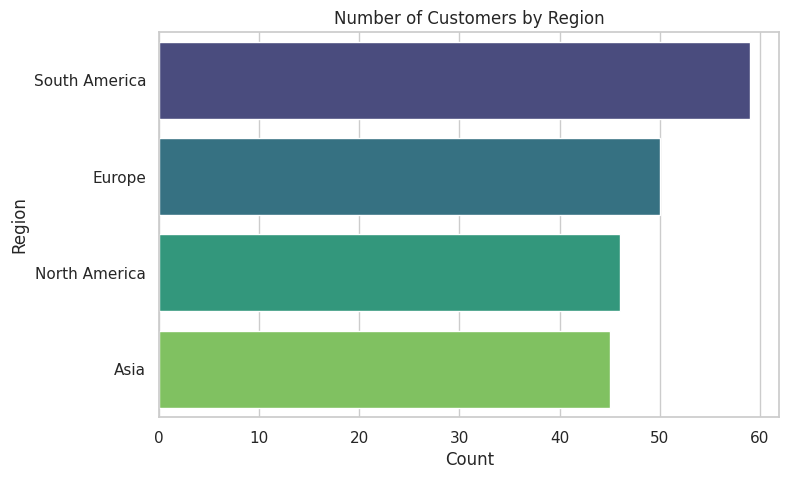

<ipython-input-6-12b03d8859a5>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  customers_df.set_index("SignupDate").resample("M").count()["CustomerID"].plot(marker="o", color="b")


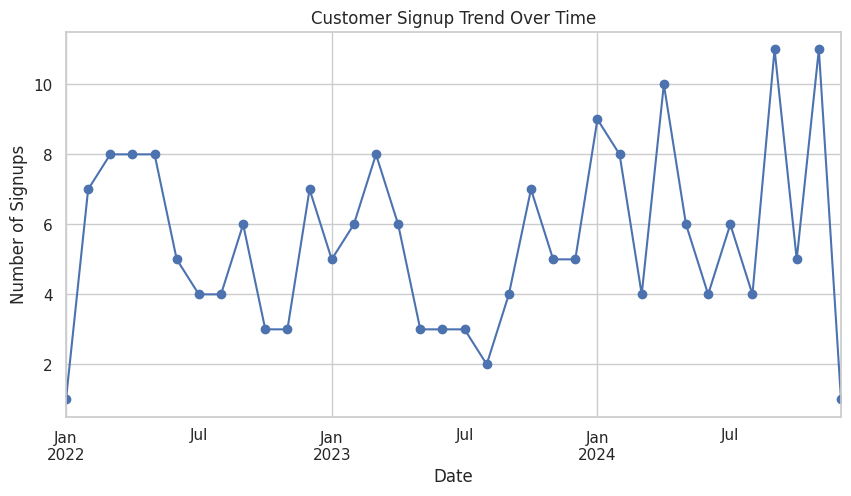

<ipython-input-6-12b03d8859a5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalValue", y="ProductName", data=top_products, palette="magma")


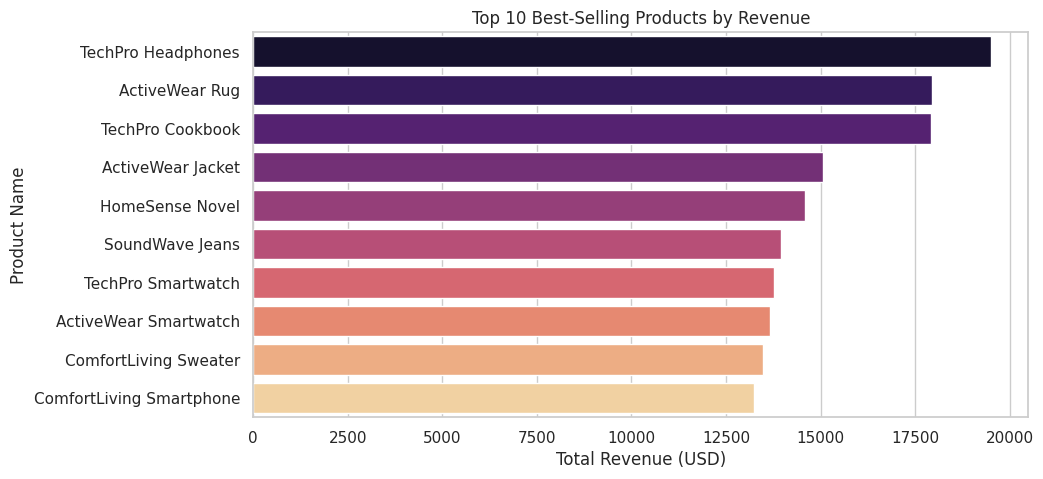

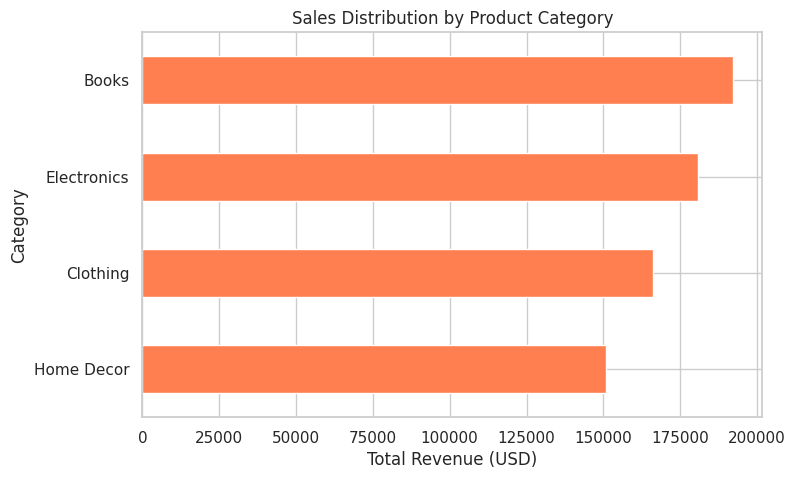

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot: Number of Customers by Region
plt.figure(figsize=(8, 5))
sns.countplot(y=customers_df["Region"], order=customers_df["Region"].value_counts().index, palette="viridis")
plt.title("Number of Customers by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

# Plot: Signup trends over time
plt.figure(figsize=(10, 5))
customers_df.set_index("SignupDate").resample("M").count()["CustomerID"].plot(marker="o", color="b")
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()

# Plot: Top 10 Products by Total Sales Value
top_products = transactions_df.groupby("ProductID")["TotalValue"].sum().nlargest(10).reset_index()
top_products = top_products.merge(products_df, on="ProductID")

plt.figure(figsize=(10, 5))
sns.barplot(x="TotalValue", y="ProductName", data=top_products, palette="magma")
plt.title("Top 10 Best-Selling Products by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

# Plot: Product Category Sales Distribution
category_sales = transactions_df.merge(products_df, on="ProductID").groupby("Category")["TotalValue"].sum().sort_values()

plt.figure(figsize=(8, 5))
category_sales.plot(kind="barh", color="coral")
plt.title("Sales Distribution by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()
